# Definición de Liberías y Paths para datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xlsxwriter
from pandas import ExcelWriter

In [2]:
try:
    import common
    import os
    from pathlib import Path
    cwd = os.getcwd()
    path = Path(cwd).parent / 'datasets' / 'septiembre'
except ImportError:
    DATA = Path().resolve() / 'datasets'
print(cwd)
print(path)


/Users/julio/Documents/Desarrollo/Developer/DataScience/REPOSITORY/datascience/Python/Análisis de Planillas - Instituciones Públicas/Python
/Users/julio/Documents/Desarrollo/Developer/DataScience/REPOSITORY/datascience/Python/Análisis de Planillas - Instituciones Públicas/datasets/septiembre


In [3]:
datasets_filepath = os.listdir(path)
september_path = str(path)
type(datasets_filepath)


list

In [4]:
df_ministerios_list = pd.DataFrame(datasets_filepath, columns=['ministerio'])
# df_ministerios_list['lista'] = df_ministerios_list['ministerio'].str.replace('.xlsx', '')
df_ministerios_list
len(datasets_filepath)
datasets_filepath
type(df_ministerios_list)
# df_ministerios_list.to_csv('/Users/julio/Desktop/ministerios.csv', encoding='utf-8-sig')
# df_ministerios_list.to_excel('/Users/julio/Desktop/ministerios.xlsx', encoding='utf8')

pandas.core.frame.DataFrame

# Definición de Dataframes por Institución Pública
> Aquí defino las variables que leeran inicialmente cada una de las instituciones públicas que estén en la fuente.

In [5]:
MIAMBIENTE = pd.read_excel(september_path+'/MINISTERIO_DE_AMBIENTE.xlsx', skiprows=4)
MEF = pd.read_excel(september_path+'/MINISTERIO_DE_ECONOMIA_Y_FINANZAS.xlsx', skiprows=4)
MIVOT = pd.read_excel(september_path+'/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL.xlsx', skiprows=4)
TCUENTAS = pd.read_excel(september_path+'/TRIBUNAL_DE_CUENTAS.xlsx', skiprows=4)
MIDES = pd.read_excel(september_path+'/MINISTERIO_DE_DESARROLLO_SOCIAL.xlsx', skiprows=4)
MIGOB = pd.read_excel(september_path+'/MINISTERIO_DE_GOBIERNO.xlsx', skiprows=4)
MITRADEL = pd.read_excel(september_path+'/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL.xlsx', skiprows=4)
MIPRE = pd.read_excel(september_path+'/MINISTERIO_DE_LA_PRESIDENCIA.xlsx', skiprows=4)
DEFENSORIA = pd.read_excel(september_path+'/DEFENSORIA_DEL_PUEBLO.xlsx', skiprows=4)
MICUL = pd.read_excel(september_path+'/MINISTERIO_DE_CULTURA.xlsx', skiprows=4)
PROCURADORIA = pd.read_excel(september_path+'/PROCURADURÍA_DE_LA_ADMINISTRACIÓN.xlsx', skiprows=4)
PROCURADORIA_GENERAL = pd.read_excel(september_path+'/PROCURADURÍA_GENERAL_DE_LA_NACIÓN.xlsx', skiprows=4)
ORGANO_JUD = pd.read_excel(september_path+'/ORGANO_JUDICIAL.xlsx', skiprows=4)
MIDESAGRO = pd.read_excel(september_path+'/MINISTERIO_DE_DESARROLLO_AGROPECUARIO.xlsx', skiprows=4)
FISCALIA_GENERAL = pd.read_excel(september_path+'/FISCALÍA_GENERAL_ELECTORAL.xlsx', skiprows=4)
MINSA = pd.read_excel(september_path+'/MINISTERIO_DE_SALUD.xlsx', skiprows=4)
OTROS_GASTOS = pd.read_excel(september_path+'/OTROS_GASTOS_DE_LA_ADMINISTRACION.xlsx', skiprows=4)
CONTRALORIA = pd.read_excel(september_path+'/CONTRALORIA_GENERAL_DE_LA_REPUBLICA.xlsx', skiprows=4)
ASAMBLEA = pd.read_excel(september_path+'/InformeConsultaPlanilla_20092022_ASAMBLEA_NACIONAL.xlsx', skiprows=4)
MISEGPUB = pd.read_excel(september_path+'/MINISTERIO_DE_SEGURIDAD_PUBLICA.xlsx', skiprows=4)
FISCALIA_CUENTAS = pd.read_excel(september_path+'/FISCALÍA_DE_CUENTAS.xlsx', skiprows=4)
MIRELAEXT = pd.read_excel(september_path+'/MINISTERIO_DE_RELACIONES_EXTERIORES.xlsx', skiprows=4)
MOP = pd.read_excel(september_path+'/MINISTERIO_DE_OBRAS_PUBLICAS.xlsx', skiprows=4)
TE = pd.read_excel(september_path+'/TRIBUNAL_ELECTORAL.xlsx', skiprows=4)
MICOMERIND = pd.read_excel(september_path+'/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS.xlsx', skiprows=4)
MEDUCA = pd.read_excel(september_path+'/MINISTERIO_DE_EDUCACION.xlsx', skiprows=4)


In [6]:
MEDUCA.head(2)

Nombre  Apellido         Cédula  \
0  AARON  CARRILLO  8-0785-002235   
1  AARON   CARRION  9-0718-000301   

                                               Cargo  Salario  Gasto  \
0  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1814.21      0   
1  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1553.10      0   

       Estado Fecha de inicio  
0  PERMANENTE      20/02/2019  
1    EVENTUAL      29/03/2019

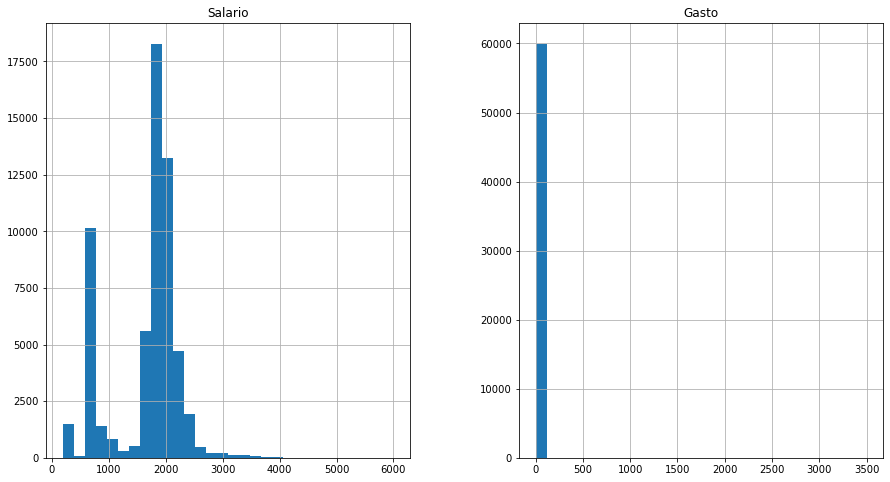

In [23]:
%matplotlib inline
MEDUCA.hist(bins=30, figsize=(15,8))
plt.show()

# Exploración de datasets

## Value Counts

<a href="https://re-thought.com/pandas-value_counts/">Link de ayuda</a>

In [7]:
MEDUCA['Cédula'].value_counts().loc[lambda x : x>1]
MEDUCA_CEDULAS_REPETIDAS = pd.DataFrame(MEDUCA['Cédula'].value_counts().loc[lambda x : x>1])
# MEDUCA_CEDULAS_REPETIDAS.to_excel('/Users/julio/Desktop/meduca_repetidas.xlsx')
MEDUCA_CEDULAS_REPETIDAS.describe()

Cédula
count   200.0
mean      2.0
std       0.0
min       2.0
25%       2.0
50%       2.0
75%       2.0
max       2.0

> Declaración de rutas para archivos de cada institución

In [8]:
LISTA_INSTITUCIONES = [
'/MINISTERIO_DE_AMBIENTE.xlsx',
'/MINISTERIO_DE_ECONOMIA_Y_FINANZAS.xlsx',
'/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL.xlsx',
'/TRIBUNAL_DE_CUENTAS.xlsx',
'/MINISTERIO_DE_DESARROLLO_SOCIAL.xlsx',
'/MINISTERIO_DE_GOBIERNO.xlsx',
'/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL.xlsx',
'/MINISTERIO_DE_LA_PRESIDENCIA.xlsx',
'/DEFENSORIA_DEL_PUEBLO.xlsx',
'/MINISTERIO_DE_CULTURA.xlsx',
'/PROCURADURÍA_DE_LA_ADMINISTRACIÓN.xlsx',
'/PROCURADURÍA_GENERAL_DE_LA_NACIÓN.xlsx',
'/ORGANO_JUDICIAL.xlsx',
'/MINISTERIO_DE_DESARROLLO_AGROPECUARIO.xlsx',
'/FISCALÍA_GENERAL_ELECTORAL.xlsx',
'/MINISTERIO_DE_SALUD.xlsx',
'/OTROS_GASTOS_DE_LA_ADMINISTRACION.xlsx',
'/CONTRALORIA_GENERAL_DE_LA_REPUBLICA.xlsx',
'/InformeConsultaPlanilla_20092022_ASAMBLEA_NACIONAL.xlsx',
'/MINISTERIO_DE_SEGURIDAD_PUBLICA.xlsx',
'/FISCALÍA_DE_CUENTAS.xlsx',
'/MINISTERIO_DE_RELACIONES_EXTERIORES.xlsx',
'/MINISTERIO_DE_OBRAS_PUBLICAS.xlsx',
'/TRIBUNAL_ELECTORAL.xlsx',
'/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS.xlsx',
'/MINISTERIO_DE_EDUCACION.xlsx'
 ]


## Análisis Horizontal por Institución Pública
> Aquí se evalua cada planilla para buscar dentro de cada inst. pública, aquellos colaboradores que se encuentren duplicados en la misma institución con 2 tipos de contratos diferentes.

In [9]:
results = pd.DataFrame(columns=['CONTADOR', 'Institucion'])
appended_data = []

for idx, p in enumerate(LISTA_INSTITUCIONES):
    if idx == idx:
        file_path = september_path + p
        df_holder = pd.read_excel(file_path, skiprows=4)
        #Crear dataframe para valores duplicados
        

        # Crear dataset con valores duplicados
        DF_CEDULAS_REPETIDAS = pd.DataFrame({
            'CONTADOR':df_holder['Cédula'].value_counts().loc[lambda x : x>1],
            # 'Nombre': df_holder['Nombre'],
            # 'Apellido' : df_holder['Apellido'],
            # 'Tipo_contrato' : df_holder['Estado'],
            # 'Remuneracion_total' : df_holder['Salario'] + df_holder['Gasto'],
            'Institucion': p.replace('.xlsx','')
        })
        DF_CEDULAS_REPETIDAS['cedula'] = DF_CEDULAS_REPETIDAS.index

        ministerio_horizontal_df = df_holder[df_holder['Cédula'].isin(DF_CEDULAS_REPETIDAS['cedula'])]
        # print(p)
        file_name = p.replace('/','')
        # print(file_name)
        check_len = len(ministerio_horizontal_df)
        # print(len(ministerio_horizontal_df))
        if check_len > 0 :
            save_file_path = '/Users/julio/Desktop/botellas_'+file_name
            # print(save_file_path)
            ministerio_horizontal_df.to_excel(save_file_path)

        # ministerio_horizontal_df.to_excel('/Users/julio/Desktop'+filename)
        appended_data.append(DF_CEDULAS_REPETIDAS)

appended_data = pd.concat(appended_data)



In [10]:
save_file_path = '/Users/julio/Desktop/botellas_completo.xlsx'
appended_data.to_excel(save_file_path)

In [11]:
home_path = '/Users/julio/Desktop/resultados_repetidos.xlsx'
appended_data['cedula'] = appended_data.index
appended_data = appended_data.reset_index(drop=True)
appended_data.to_excel(home_path)
appended_data

CONTADOR                         Institucion         cedula
0           2                /MINISTERIO_DE_SALUD  8-0839-000094
1           2  /OTROS_GASTOS_DE_LA_ADMINISTRACION  7-0705-001595
2           2  /OTROS_GASTOS_DE_LA_ADMINISTRACION  7-0113-000174
3           2  /OTROS_GASTOS_DE_LA_ADMINISTRACION  7-0105-000539
4           2  /OTROS_GASTOS_DE_LA_ADMINISTRACION  7-0095-000411
..        ...                                 ...            ...
201         2            /MINISTERIO_DE_EDUCACION  9-0101-000098
202         2            /MINISTERIO_DE_EDUCACION  9-0743-001129
203         2            /MINISTERIO_DE_EDUCACION  4-0206-000468
204         2            /MINISTERIO_DE_EDUCACION  6-0702-001674
205         2            /MINISTERIO_DE_EDUCACION  8-0974-000609

[206 rows x 3 columns]

<AxesSubplot:>

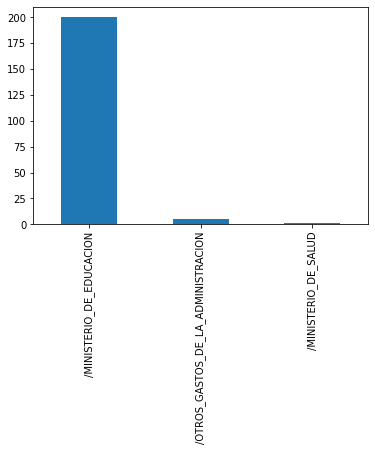

In [12]:
appended_data['Institucion'].value_counts().loc[lambda x : x>0]
repetidos_df = appended_data['Institucion'].value_counts().loc[lambda x : x>0]
repetidos_df.plot.bar()

## Análisis Vertical

In [73]:
from datetime import date

today = date.today()
print("Today's date:", today)
MEDUCA.head()

Today's date: 2022-09-22


Nombre  Apellido         Cédula  \
0  AARON  CARRILLO  8-0785-002235   
1  AARON   CARRION  9-0718-000301   
2  AARON    CEDENO  1-0050-000006   
3  AARON  GONZALEZ  9-0714-000675   
4  AARON     MAURE  6-0064-000178   

                                               Cargo  Salario  Gasto  \
0  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1814.21      0   
1  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1553.10      0   
2  EDUCADOR L 1 (SUBDIRECTOR ESC.PRIM.TIT. UNIV.E...  2042.33      0   
3  EDUCADOR F 2 (MAESTRO ESC.PRIM.TIT.UNIV LIC.ED...  1800.46      0   
4  EDUCADOR F 3 (MAESTRO ESC.PRIM.TIT.UNIV PROF.E...  2076.70      0   

       Estado Fecha de inicio  
0  PERMANENTE      20/02/2019  
1    EVENTUAL      29/03/2019  
2  PERMANENTE      13/02/2013  
3  PERMANENTE      12/03/2001  
4  PERMANENTE      05/05/1999

### Todos los ministerios en 1 dataframe

In [75]:
ministerios_data = []
for idx, p in enumerate(LISTA_INSTITUCIONES):
    if idx == idx:
        file_path = september_path + p
        df_holder = pd.read_excel(file_path, skiprows=4)
        
        #Crear dataframe temporal por institución para luego concatenarlo al dataframe consolidado
        DF_CEDULAS_REPETIDAS = pd.DataFrame({
            'Cedula' : df_holder['Cédula'],
            'Cargo' : df_holder['Cargo'],
            'Contrato' : df_holder['Estado'],
            'Salario' : df_holder['Salario'],
            'Gasto' : df_holder['Gasto'],
            'Remuneracion Total' : df_holder['Salario'] + df_holder['Gasto'],
            'Institucion': p.replace('.xlsx','')
        })
        ministerios_data.append(DF_CEDULAS_REPETIDAS)

ministerios_data = pd.concat(ministerios_data)



In [76]:
home_path = '/Users/julio/Desktop/ministerios_total.xlsx'
ministerios_data = ministerios_data.reset_index(drop=True)
print(ministerios_data.describe())
ministerios_data.head()
# ministerios_data.to_excel(home_path)

             Salario          Gasto  Remuneracion Total
count  165331.000000  165331.000000       165331.000000
mean     1526.149448      21.289698         1547.439146
std       873.467268     203.105513          940.313292
min       186.000000       0.000000          186.000000
25%       900.000000       0.000000          900.000000
50%      1421.400000       0.000000         1421.400000
75%      1926.220000       0.000000         1926.225000
max      9457.750000    8500.000000        12452.000000


Cedula                       Cargo    Contrato  Salario  Gasto  \
0  9-0111-002744          PROMOTOR COMUNAL I  PERMANENTE   1000.0      0   
1  9-0131-000037  INGENIERO FORESTAL III (2)  PERMANENTE   3367.0      0   
2  5-0710-000709              AGRONOMO I (3)  PERMANENTE    999.0      0   
3  9-0717-000248   CONDUCTOR DE VEHICULO   I  PERMANENTE    600.0      0   
4  9-0207-000957    EVALUADOR DE PROYECTOS I    EVENTUAL   1900.0      0   

   Remuneracion Total              Institucion  
0              1000.0  /MINISTERIO_DE_AMBIENTE  
1              3367.0  /MINISTERIO_DE_AMBIENTE  
2               999.0  /MINISTERIO_DE_AMBIENTE  
3               600.0  /MINISTERIO_DE_AMBIENTE  
4              1900.0  /MINISTERIO_DE_AMBIENTE

In [77]:
ministerios_data.head(2)

Cedula                       Cargo    Contrato  Salario  Gasto  \
0  9-0111-002744          PROMOTOR COMUNAL I  PERMANENTE   1000.0      0   
1  9-0131-000037  INGENIERO FORESTAL III (2)  PERMANENTE   3367.0      0   

   Remuneracion Total              Institucion  
0              1000.0  /MINISTERIO_DE_AMBIENTE  
1              3367.0  /MINISTERIO_DE_AMBIENTE

In [78]:
# ministerios_data.groupby(ministerios_data['Institucion']).count()
# ministerios_data.groupby(['Institucion','Contrato'])['Institucion'].count().to_excel('/Users/julio/Desktop/agrupaciones.xlsx')
ministerios_data.groupby(['Institucion','Contrato'])['Institucion'].count()

Institucion                           Contrato  
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA  EVENTUAL       846
                                      PERMANENTE    3594
/DEFENSORIA_DEL_PUEBLO                EVENTUAL        30
                                      PERMANENTE     206
/FISCALÍA_DE_CUENTAS                 EVENTUAL        27
                                                    ... 
/PROCURADURÍA_GENERAL_DE_LA_NACIÓN  PERMANENTE    4823
/TRIBUNAL_DE_CUENTAS                  EVENTUAL        22
                                      PERMANENTE      95
/TRIBUNAL_ELECTORAL                   EVENTUAL        69
                                      PERMANENTE    2979
Name: Institucion, Length: 62, dtype: int64

## Top 10 Puestos mejor Pagados
***

In [98]:
top_salarios = pd.DataFrame(ministerios_data['Remuneracion Total'].nlargest(20))
top_salarios['id'] = top_salarios.index
top_10_salarios = ministerios_data[ministerios_data.index.isin(top_salarios['id'])]
# top_10_salarios['Salario'] = top_10_salarios['Salario'].apply(lambda x: "${:.1f}".format((x)))
# top_10_salarios['Gasto'] = top_10_salarios['Gasto'].apply(lambda x: "${:.1f}".format((x)))
# top_10_salarios['Remuneracion Total'] = top_10_salarios['Remuneracion Total'].apply(lambda x: "${:,.2f}".format((x)))
top_10_salarios = top_10_salarios.sort_values(by=['Remuneracion Total'], ascending=False)
top_10_salarios = top_10_salarios.reset_index(drop=True)

top_10_salarios.to_excel('/Users/julio/Desktop/top10Salarios.xlsx')
top_10_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cedula              20 non-null     object 
 1   Cargo               20 non-null     object 
 2   Contrato            20 non-null     object 
 3   Salario             20 non-null     float64
 4   Gasto               20 non-null     int64  
 5   Remuneracion Total  20 non-null     float64
 6   Institucion         20 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB


In [19]:
repetidos = pd.DataFrame(ministerios_data['Cedula'].value_counts().loc[lambda x : x>1])
repetidos['id'] = repetidos.index
repetidos = repetidos.reset_index(drop=True)


In [20]:
# repetidos.info()
repetidos

Cedula             id
0         2  3-0124-000510
1         2  8-0530-001050
2         2  7-0113-000174
3         2  8-0531-000267
4         2  8-0373-000345
..      ...            ...
297       2  3-0720-002451
298       2  8-0237-002769
299       2  6-0083-000690
300       2  2-0086-002632
301       2  3-0098-000136

[302 rows x 2 columns]

> Buscar del full dataframe solo los que están repetidos

In [95]:
file_path = '/Users/julio/Desktop/repetidos_analisis_vertical_completo.xlsx'
ministerios_data_repetidos = ministerios_data[ministerios_data['Cedula'].isin(repetidos['id'])]
ministerios_data_repetidos = ministerios_data_repetidos.reset_index(drop=True)
#ministerios_data_repetidos.to_excel(file_path)
ministerios_data_repetidos
# busca_repetido = ministerios_data_repetidos[ministerios_data_repetidos['Cedula'].isin(['3-0111-000446'])]
# busca_repetido = ministerios_data_repetidos[ministerios_data_repetidos['Cedula'].isin(top_10_salarios['Cedula'])]
# busca_repetido

Cedula                                              Cargo  \
0     3-0081-002521                                        INSPECTOR I   
1     2-0087-001234                         INGENIERO FORESTAL III (1)   
2     7-0121-000221                                    ADMINISTRADOR I   
3     2-0134-000400                          CONDUCTOR DE VEHICULO   I   
4     3-0703-001908                                        INSPECTOR I   
..              ...                                                ...   
599   9-0185-000370  EDUCADOR F 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.P...   
600   9-0185-000370  EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...   
601  10-0007-000016  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...   
602  10-0007-000016                                   PROMOTOR COMUNAL   
603   9-0733-000679  EDUCADOR J 1 (MAESTRO ESC.PRIM.TIT.PROF EDUC.S...   

       Contrato  Salario  Gasto  Remuneracion Total               Institucion  
0    PERMANENTE   600.00      0              600.00   /MINISTERIO_DE_AMBIENTE  
1    PERMANENTE  3367.00      0             3367.00   /MINISTERIO_DE_AMBIENTE  
2    PERMANENTE   700.00      0              700.00   /MINISTERIO_DE_AMBIENTE  
3    PERMANENTE   625.00      0              625.00   /MINISTERIO_DE_AMBIENTE  
4    PERMANENTE   600.00      0              600.00   /MINISTERIO_DE_AMBIENTE  
..          ...      ...    ...                 ...                       ...  
599    EVENTUAL   394.00      0              394.00  /MINISTERIO_DE_EDUCACION  
600  PERMANENTE  1877.37      0             1877.37  /MINISTERIO_DE_EDUCACION  
601  PERMANENTE  1926.22      0             1926.22  /MINISTERIO_DE_EDUCACION  
602    EVENTUAL   371.00      0              371.00  /MINISTERIO_DE_EDUCACION  
603  PERMANENTE  1763.22      0             1763.22  /MINISTERIO_DE_EDUCACION  

[604 rows x 7 columns]

> Gasto público total de todas las instituciones analizadas
***

In [40]:
monthly_payroll = ministerios_data['Remuneracion Total'].sum()
annual_payroll = monthly_payroll * 12
print('Planilla Mensual:',f'${monthly_payroll:,.2f}')
print('Planilla Anual:' , f'${annual_payroll:,.2f}')

Planilla Mensual: $255,839,661.45
Planilla Anual: $3,070,075,937.40


In [31]:
presupuesto_institucion = pd.DataFrame({
    'Institucion' : ministerios_data['Institucion'],
    'Gasto Total' : ministerios_data['Remuneracion Total']
})
presupuestos_agrupados = pd.DataFrame(presupuesto_institucion.groupby('Institucion').sum())
presupuestos_agrupados['Gasto Total Cur'] = presupuestos_agrupados['Gasto Total'].apply(lambda x: "${:,.1f}".format((x)))
presupuestos_agrupados = presupuestos_agrupados.sort_values(by=['Gasto Total'], ascending=True)
presupuestos_agrupados


Gasto Total  \
Institucion                                                       
/TRIBUNAL_DE_CUENTAS                                  218762.00   
/FISCALÍA_DE_CUENTAS                                 226725.00   
/FISCALÍA_GENERAL_ELECTORAL                          314735.00   
/DEFENSORIA_DEL_PUEBLO                                321914.00   
/PROCURADURÍA_DE_LA_ADMINISTRACIÓN                  387538.18   
/MINISTERIO_DE_CULTURA                                839574.00   
/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL   1057128.71   
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                 1070266.00   
/MINISTERIO_DE_RELACIONES_EXTERIORES                 1219393.00   
/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL          1298477.00   
/OTROS_GASTOS_DE_LA_ADMINISTRACION                   1987500.00   
/MINISTERIO_DE_OBRAS_PUBLICAS                        2678285.00   
/MINISTERIO_DE_DESARROLLO_SOCIAL                     2803797.00   
/MINISTERIO_DE_AMBIENTE                              2961527.00   
/TRIBUNAL_ELECTORAL                                  3407994.00   
/MINISTERIO_DE_GOBIERNO                              3620275.60   
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                   4177211.40   
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO               4245290.50   
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                 6677518.25   
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...   7091098.00   
/MINISTERIO_DE_LA_PRESIDENCIA                        7169256.70   
/ORGANO_JUDICIAL                                    11126971.37   
/PROCURADURÍA_GENERAL_DE_LA_NACIÓN                11437913.29   
/MINISTERIO_DE_SALUD                                40107682.79   
/MINISTERIO_DE_SEGURIDAD_PUBLICA                    40707072.64   
/MINISTERIO_DE_EDUCACION                            98685755.02   

                                                   Gasto Total Cur  
Institucion                                                         
/TRIBUNAL_DE_CUENTAS                                    $218,762.0  
/FISCALÍA_DE_CUENTAS                                   $226,725.0  
/FISCALÍA_GENERAL_ELECTORAL                            $314,735.0  
/DEFENSORIA_DEL_PUEBLO                                  $321,914.0  
/PROCURADURÍA_DE_LA_ADMINISTRACIÓN                    $387,538.2  
/MINISTERIO_DE_CULTURA                                  $839,574.0  
/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL    $1,057,128.7  
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                  $1,070,266.0  
/MINISTERIO_DE_RELACIONES_EXTERIORES                  $1,219,393.0  
/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL           $1,298,477.0  
/OTROS_GASTOS_DE_LA_ADMINISTRACION                    $1,987,500.0  
/MINISTERIO_DE_OBRAS_PUBLICAS                         $2,678,285.0  
/MINISTERIO_DE_DESARROLLO_SOCIAL                      $2,803,797.0  
/MINISTERIO_DE_AMBIENTE                               $2,961,527.0  
/TRIBUNAL_ELECTORAL                                   $3,407,994.0  
/MINISTERIO_DE_GOBIERNO                               $3,620,275.6  
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                    $4,177,211.4  
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO                $4,245,290.5  
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                  $6,677,518.2  
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...    $7,091,098.0  
/MINISTERIO_DE_LA_PRESIDENCIA                         $7,169,256.7  
/ORGANO_JUDICIAL                                     $11,126,971.4  
/PROCURADURÍA_GENERAL_DE_LA_NACIÓN                 $11,437,913.3  
/MINISTERIO_DE_SALUD                                 $40,107,682.8  
/MINISTERIO_DE_SEGURIDAD_PUBLICA                     $40,707,072.6  
/MINISTERIO_DE_EDUCACION                             $98,685,755.0

<AxesSubplot:ylabel='Institucion'>

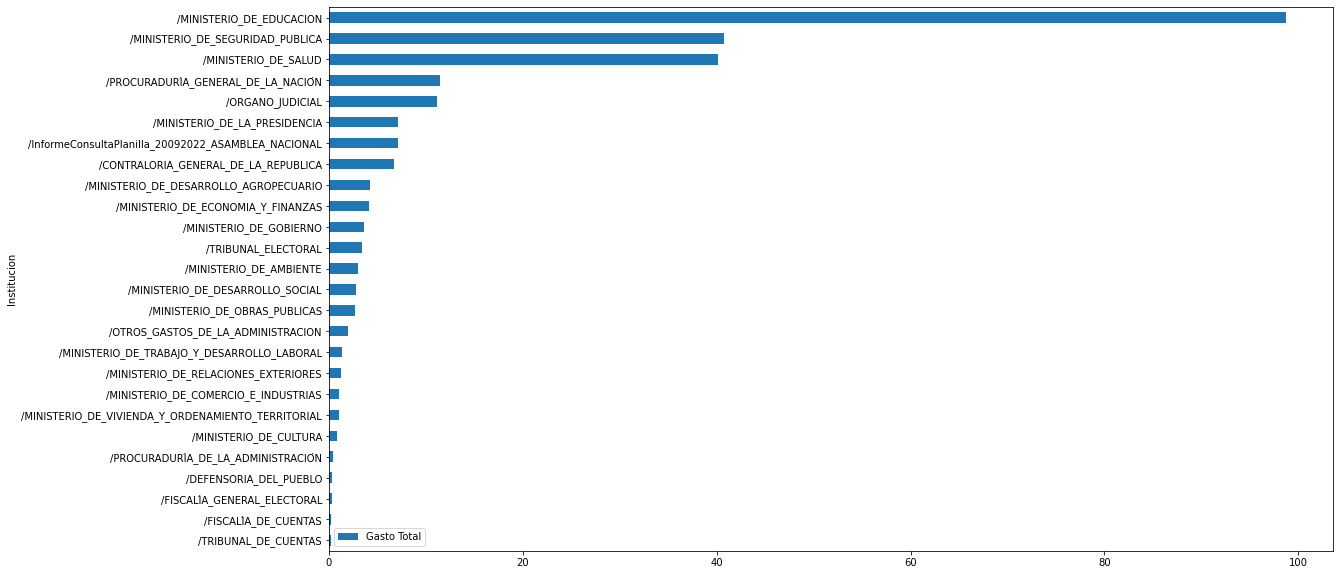

In [187]:
presupuestos_agrupados['Gasto Total'] = presupuestos_agrupados['Gasto Total']/1000000
presupuestos_agrupados.plot.barh(figsize=(18,10))

In [226]:
presupuestos_agrupados

Gasto Total  \
Institucion                                                       
/TRIBUNAL_DE_CUENTAS                                   0.218762   
/FISCALÍA_DE_CUENTAS                                  0.226725   
/FISCALÍA_GENERAL_ELECTORAL                           0.314735   
/DEFENSORIA_DEL_PUEBLO                                 0.321914   
/PROCURADURÍA_DE_LA_ADMINISTRACIÓN                   0.387538   
/MINISTERIO_DE_CULTURA                                 0.839574   
/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL     1.057129   
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                   1.070266   
/MINISTERIO_DE_RELACIONES_EXTERIORES                   1.219393   
/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL            1.298477   
/OTROS_GASTOS_DE_LA_ADMINISTRACION                     1.987500   
/MINISTERIO_DE_OBRAS_PUBLICAS                          2.678285   
/MINISTERIO_DE_DESARROLLO_SOCIAL                       2.803797   
/MINISTERIO_DE_AMBIENTE                                2.961527   
/TRIBUNAL_ELECTORAL                                    3.407994   
/MINISTERIO_DE_GOBIERNO                                3.620276   
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                     4.177211   
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO                 4.245291   
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                   6.677518   
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...     7.091098   
/MINISTERIO_DE_LA_PRESIDENCIA                          7.169257   
/ORGANO_JUDICIAL                                      11.126971   
/PROCURADURÍA_GENERAL_DE_LA_NACIÓN                  11.437913   
/MINISTERIO_DE_SALUD                                  40.107683   
/MINISTERIO_DE_SEGURIDAD_PUBLICA                      40.707073   
/MINISTERIO_DE_EDUCACION                              98.685755   

                                                   Gasto Total Cur  
Institucion                                                         
/TRIBUNAL_DE_CUENTAS                                    $218,762.0  
/FISCALÍA_DE_CUENTAS                                   $226,725.0  
/FISCALÍA_GENERAL_ELECTORAL                            $314,735.0  
/DEFENSORIA_DEL_PUEBLO                                  $321,914.0  
/PROCURADURÍA_DE_LA_ADMINISTRACIÓN                    $387,538.2  
/MINISTERIO_DE_CULTURA                                  $839,574.0  
/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL    $1,057,128.7  
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                  $1,070,266.0  
/MINISTERIO_DE_RELACIONES_EXTERIORES                  $1,219,393.0  
/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL           $1,298,477.0  
/OTROS_GASTOS_DE_LA_ADMINISTRACION                    $1,987,500.0  
/MINISTERIO_DE_OBRAS_PUBLICAS                         $2,678,285.0  
/MINISTERIO_DE_DESARROLLO_SOCIAL                      $2,803,797.0  
/MINISTERIO_DE_AMBIENTE                               $2,961,527.0  
/TRIBUNAL_ELECTORAL                                   $3,407,994.0  
/MINISTERIO_DE_GOBIERNO                               $3,620,275.6  
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                    $4,177,211.4  
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO                $4,245,290.5  
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                  $6,677,518.2  
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...    $7,091,098.0  
/MINISTERIO_DE_LA_PRESIDENCIA                         $7,169,256.7  
/ORGANO_JUDICIAL                                     $11,126,971.4  
/PROCURADURÍA_GENERAL_DE_LA_NACIÓN                 $11,437,913.3  
/MINISTERIO_DE_SALUD                                 $40,107,682.8  
/MINISTERIO_DE_SEGURIDAD_PUBLICA                     $40,707,072.6  
/MINISTERIO_DE_EDUCACION                             $98,685,755.0

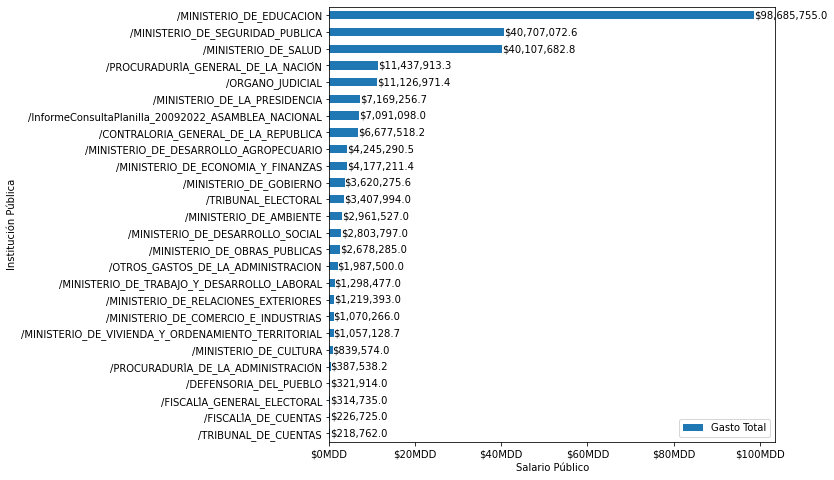

In [253]:
from cProfile import label
import matplotlib.ticker as mtick

ax = presupuestos_agrupados.plot.barh(figsize=(8,8))
fmt = '${x:,.0f}MDD'
tick = mtick.StrMethodFormatter(fmt)

x = presupuestos_agrupados['Gasto Total Cur'].values
x = x.tolist()
ax.bar_label(ax.containers[0], labels= x ,label_type='edge')
ax.xaxis.set_major_formatter(tick)
ax.legend(loc='lower right')
plt.xlabel("Salario Público")
plt.ylabel("Institución Pública")
plt.show()


In [237]:
x = presupuestos_agrupados['Gasto Total Cur'].values
x = x.tolist()
x

['$218,762.0',
 '$226,725.0',
 '$314,735.0',
 '$321,914.0',
 '$387,538.2',
 '$839,574.0',
 '$1,057,128.7',
 '$1,070,266.0',
 '$1,219,393.0',
 '$1,298,477.0',
 '$1,987,500.0',
 '$2,678,285.0',
 '$2,803,797.0',
 '$2,961,527.0',
 '$3,407,994.0',
 '$3,620,275.6',
 '$4,177,211.4',
 '$4,245,290.5',
 '$6,677,518.2',
 '$7,091,098.0',
 '$7,169,256.7',
 '$11,126,971.4',
 '$11,437,913.3',
 '$40,107,682.8',
 '$40,707,072.6',
 '$98,685,755.0']

In [158]:
presupuestos_agrupados = presupuestos_agrupados.sort_values(by=['Gasto Total'], ascending= False)
presupuestos_agrupados

Gasto Total  \
Institucion                                                       
/MINISTERIO_DE_EDUCACION                            98685755.02   
/MINISTERIO_DE_SEGURIDAD_PUBLICA                    40707072.64   
/MINISTERIO_DE_SALUD                                40107682.79   
/PROCURADURÍA_GENERAL_DE_LA_NACIÓN                11437913.29   
/ORGANO_JUDICIAL                                    11126971.37   
/MINISTERIO_DE_LA_PRESIDENCIA                        7169256.70   
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...   7091098.00   
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                 6677518.25   
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO               4245290.50   
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                   4177211.40   
/MINISTERIO_DE_GOBIERNO                              3620275.60   
/TRIBUNAL_ELECTORAL                                  3407994.00   
/MINISTERIO_DE_AMBIENTE                              2961527.00   
/MINISTERIO_DE_DESARROLLO_SOCIAL                     2803797.00   
/MINISTERIO_DE_OBRAS_PUBLICAS                        2678285.00   
/OTROS_GASTOS_DE_LA_ADMINISTRACION                   1987500.00   
/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL          1298477.00   
/MINISTERIO_DE_RELACIONES_EXTERIORES                 1219393.00   
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                 1070266.00   
/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL   1057128.71   
/MINISTERIO_DE_CULTURA                                839574.00   
/PROCURADURÍA_DE_LA_ADMINISTRACIÓN                  387538.18   
/DEFENSORIA_DEL_PUEBLO                                321914.00   
/FISCALÍA_GENERAL_ELECTORAL                          314735.00   
/FISCALÍA_DE_CUENTAS                                 226725.00   
/TRIBUNAL_DE_CUENTAS                                  218762.00   

                                                   Gasto Total Cur  
Institucion                                                         
/MINISTERIO_DE_EDUCACION                             $98,685,755.0  
/MINISTERIO_DE_SEGURIDAD_PUBLICA                     $40,707,072.6  
/MINISTERIO_DE_SALUD                                 $40,107,682.8  
/PROCURADURÍA_GENERAL_DE_LA_NACIÓN                 $11,437,913.3  
/ORGANO_JUDICIAL                                     $11,126,971.4  
/MINISTERIO_DE_LA_PRESIDENCIA                         $7,169,256.7  
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...    $7,091,098.0  
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                  $6,677,518.2  
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO                $4,245,290.5  
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                    $4,177,211.4  
/MINISTERIO_DE_GOBIERNO                               $3,620,275.6  
/TRIBUNAL_ELECTORAL                                   $3,407,994.0  
/MINISTERIO_DE_AMBIENTE                               $2,961,527.0  
/MINISTERIO_DE_DESARROLLO_SOCIAL                      $2,803,797.0  
/MINISTERIO_DE_OBRAS_PUBLICAS                         $2,678,285.0  
/OTROS_GASTOS_DE_LA_ADMINISTRACION                    $1,987,500.0  
/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL           $1,298,477.0  
/MINISTERIO_DE_RELACIONES_EXTERIORES                  $1,219,393.0  
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                  $1,070,266.0  
/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL    $1,057,128.7  
/MINISTERIO_DE_CULTURA                                  $839,574.0  
/PROCURADURÍA_DE_LA_ADMINISTRACIÓN                    $387,538.2  
/DEFENSORIA_DEL_PUEBLO                                  $321,914.0  
/FISCALÍA_GENERAL_ELECTORAL                            $314,735.0  
/FISCALÍA_DE_CUENTAS                                   $226,725.0  
/TRIBUNAL_DE_CUENTAS                                    $218,762.0

In [162]:
currency = "${:,.2f}".format(total)
currency
presupuestos_agrupados_df = pd.DataFrame(presupuestos_agrupados)
presupuestos_agrupados_df['inst'] = presupuestos_agrupados_df.index
presupuestos_agrupados_df['Gasto Total Cur'] = presupuestos_agrupados_df['Gasto Total'].apply(lambda x: "${:,.2f}".format((x/1000)))
presupuestos_agrupados_df = presupuestos_agrupados_df.sort_values(by=['Gasto Total'],ascending=False)
presupuestos_agrupados_df

Gasto Total  \
Institucion                                                       
/MINISTERIO_DE_EDUCACION                              98.685755   
/MINISTERIO_DE_SEGURIDAD_PUBLICA                      40.707073   
/MINISTERIO_DE_SALUD                                  40.107683   
/PROCURADURÍA_GENERAL_DE_LA_NACIÓN                  11.437913   
/ORGANO_JUDICIAL                                      11.126971   
/MINISTERIO_DE_LA_PRESIDENCIA                          7.169257   
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...     7.091098   
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                   6.677518   
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO                 4.245291   
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                     4.177211   
/MINISTERIO_DE_GOBIERNO                                3.620276   
/TRIBUNAL_ELECTORAL                                    3.407994   
/MINISTERIO_DE_AMBIENTE                                2.961527   
/MINISTERIO_DE_DESARROLLO_SOCIAL                       2.803797   
/MINISTERIO_DE_OBRAS_PUBLICAS                          2.678285   
/OTROS_GASTOS_DE_LA_ADMINISTRACION                     1.987500   
/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL            1.298477   
/MINISTERIO_DE_RELACIONES_EXTERIORES                   1.219393   
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                   1.070266   
/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL     1.057129   
/MINISTERIO_DE_CULTURA                                 0.839574   
/PROCURADURÍA_DE_LA_ADMINISTRACIÓN                   0.387538   
/DEFENSORIA_DEL_PUEBLO                                 0.321914   
/FISCALÍA_GENERAL_ELECTORAL                           0.314735   
/FISCALÍA_DE_CUENTAS                                  0.226725   
/TRIBUNAL_DE_CUENTAS                                   0.218762   

                                                   Gasto Total Cur  \
Institucion                                                          
/MINISTERIO_DE_EDUCACION                                     $0.10   
/MINISTERIO_DE_SEGURIDAD_PUBLICA                             $0.04   
/MINISTERIO_DE_SALUD                                         $0.04   
/PROCURADURÍA_GENERAL_DE_LA_NACIÓN                         $0.01   
/ORGANO_JUDICIAL                                             $0.01   
/MINISTERIO_DE_LA_PRESIDENCIA                                $0.01   
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...           $0.01   
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                         $0.01   
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO                       $0.00   
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                           $0.00   
/MINISTERIO_DE_GOBIERNO                                      $0.00   
/TRIBUNAL_ELECTORAL                                          $0.00   
/MINISTERIO_DE_AMBIENTE                                      $0.00   
/MINISTERIO_DE_DESARROLLO_SOCIAL                             $0.00   
/MINISTERIO_DE_OBRAS_PUBLICAS                                $0.00   
/OTROS_GASTOS_DE_LA_ADMINISTRACION                           $0.00   
/MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL                  $0.00   
/MINISTERIO_DE_RELACIONES_EXTERIORES                         $0.00   
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                         $0.00   
/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL           $0.00   
/MINISTERIO_DE_CULTURA                                       $0.00   
/PROCURADURÍA_DE_LA_ADMINISTRACIÓN                         $0.00   
/DEFENSORIA_DEL_PUEBLO                                       $0.00   
/FISCALÍA_GENERAL_ELECTORAL                                 $0.00   
/FISCALÍA_DE_CUENTAS                                        $0.00   
/TRIBUNAL_DE_CUENTAS                                         $0.00   

                                                                                                 inst  
Institucion                                                                                            
/MINIS

In [163]:
# ministerios_data_repetidos.to_excel('/Users/julio/Desktop/test.xlsx')
ministerios_data_repetidos['Institucion'] = ministerios_data_repetidos['Institucion'].astype('string')
group = pd.DataFrame(ministerios_data_repetidos.groupby('Institucion').sum())
group.append(group.sum(numeric_only=True), ignore_index=True)
# group.to_excel('/Users/julio/Desktop/tesstt.xlsx')
group.loc['Total'] = pd.Series(group['Remuneracion Total'].sum(), index = ['Remuneracion Total'])
group
# group.to_excel('/Users/julio/Desktop/gasto_total_analisis_vertical.xlsx')

/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_7499/3924563488.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group.append(group.sum(numeric_only=True), ignore_index=True)


Salario  Gasto  \
Institucion                                                            
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                  3461.00    0.0   
/DEFENSORIA_DEL_PUEBLO                                2000.00    0.0   
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...    2500.00    0.0   
/MINISTERIO_DE_AMBIENTE                               9442.00    0.0   
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                  2000.00    0.0   
/MINISTERIO_DE_CULTURA                               28169.00    0.0   
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO                9211.00    0.0   
/MINISTERIO_DE_DESARROLLO_SOCIAL                      6300.00    0.0   
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                    1200.00    0.0   
/MINISTERIO_DE_EDUCACION                            543298.36    0.0   
/MINISTERIO_DE_GOBIERNO                              16330.00    0.0   
/MINISTERIO_DE_LA_PRESIDENCIA                         2600.00    0.0   
/MINISTERIO_DE_OBRAS_PUBLICAS                         7050.00    0.0   
/MINISTERIO_DE_SALUD                                 22685.12    0.0   
/MINISTERIO_DE_SEGURIDAD_PUBLICA                     14172.90    0.0   
/ORGANO_JUDICIAL                                       885.00    0.0   
/OTROS_GASTOS_DE_LA_ADMINISTRACION                   84400.00    0.0   
Total                                                     NaN    NaN   

                                                    Remuneracion Total  
Institucion                                                             
/CONTRALORIA_GENERAL_DE_LA_REPUBLICA                           3461.00  
/DEFENSORIA_DEL_PUEBLO                                         2000.00  
/InformeConsultaPlanilla_20092022_ASAMBLEA_NACI...             2500.00  
/MINISTERIO_DE_AMBIENTE                                        9442.00  
/MINISTERIO_DE_COMERCIO_E_INDUSTRIAS                           2000.00  
/MINISTERIO_DE_CULTURA                                        28169.00  
/MINISTERIO_DE_DESARROLLO_AGROPECUARIO                         9211.00  
/MINISTERIO_DE_DESARROLLO_SOCIAL                               6300.00  
/MINISTERIO_DE_ECONOMIA_Y_FINANZAS                             1200.00  
/MINISTERIO_DE_EDUCACION                                     543298.36  
/MINISTERIO_DE_GOBIERNO                                       16330.00  
/MINISTERIO_DE_LA_PRESIDENCIA                                  2600.00  
/MINISTERIO_DE_OBRAS_PUBLICAS                                  7050.00  
/MINISTERIO_DE_SALUD                                          22685.12  
/MINISTERIO_DE_SEGURIDAD_PUBLICA                              14172.90  
/ORGANO_JUDICIAL                                                885.00  
/OTROS_GASTOS_DE_LA_ADMINISTRACION                            84400.00  
Total                                                        755704.38

In [164]:
from turtle import title


ministerios_data_repetidos_plot = pd.DataFrame(ministerios_data_repetidos['Institucion'].value_counts())


<AxesSubplot:title={'center':'Cédulas repetidas encontradas en diferentes instituciones públicas'}>

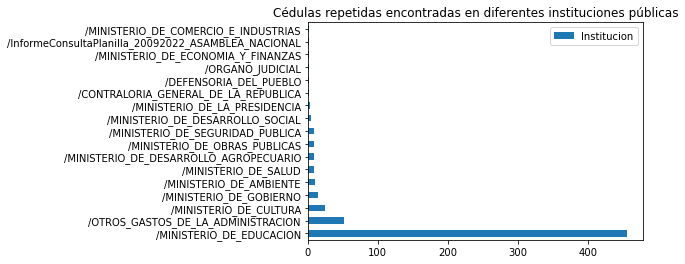

In [165]:
ministerios_data_repetidos_plot.plot.barh(title='Cédulas repetidas encontradas en diferentes instituciones públicas')